In [154]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [155]:
def f(theta):
    return theta**4 - theta**2 - theta**3 + theta

def k(theta, cont):
    return (1/np.sqrt(2*np.pi*cont))*np.exp(-(theta**2)/(2*cont))

def g(theta, cont):
    n = 100
    theta_ = np.linspace(-6*np.sqrt(cont), 6*np.sqrt(cont), n)
    dtheta = theta_[1] - theta_[0]
    
    sum = (f(theta - theta_[0])*k(theta_[0], cont) + f(theta - theta_[-1])*k(theta_[-1], cont))/2
    for i in range(1, n-1):
        sum += f(theta - theta_[i])*k(theta_[i], cont)
    sum *= dtheta
    return sum

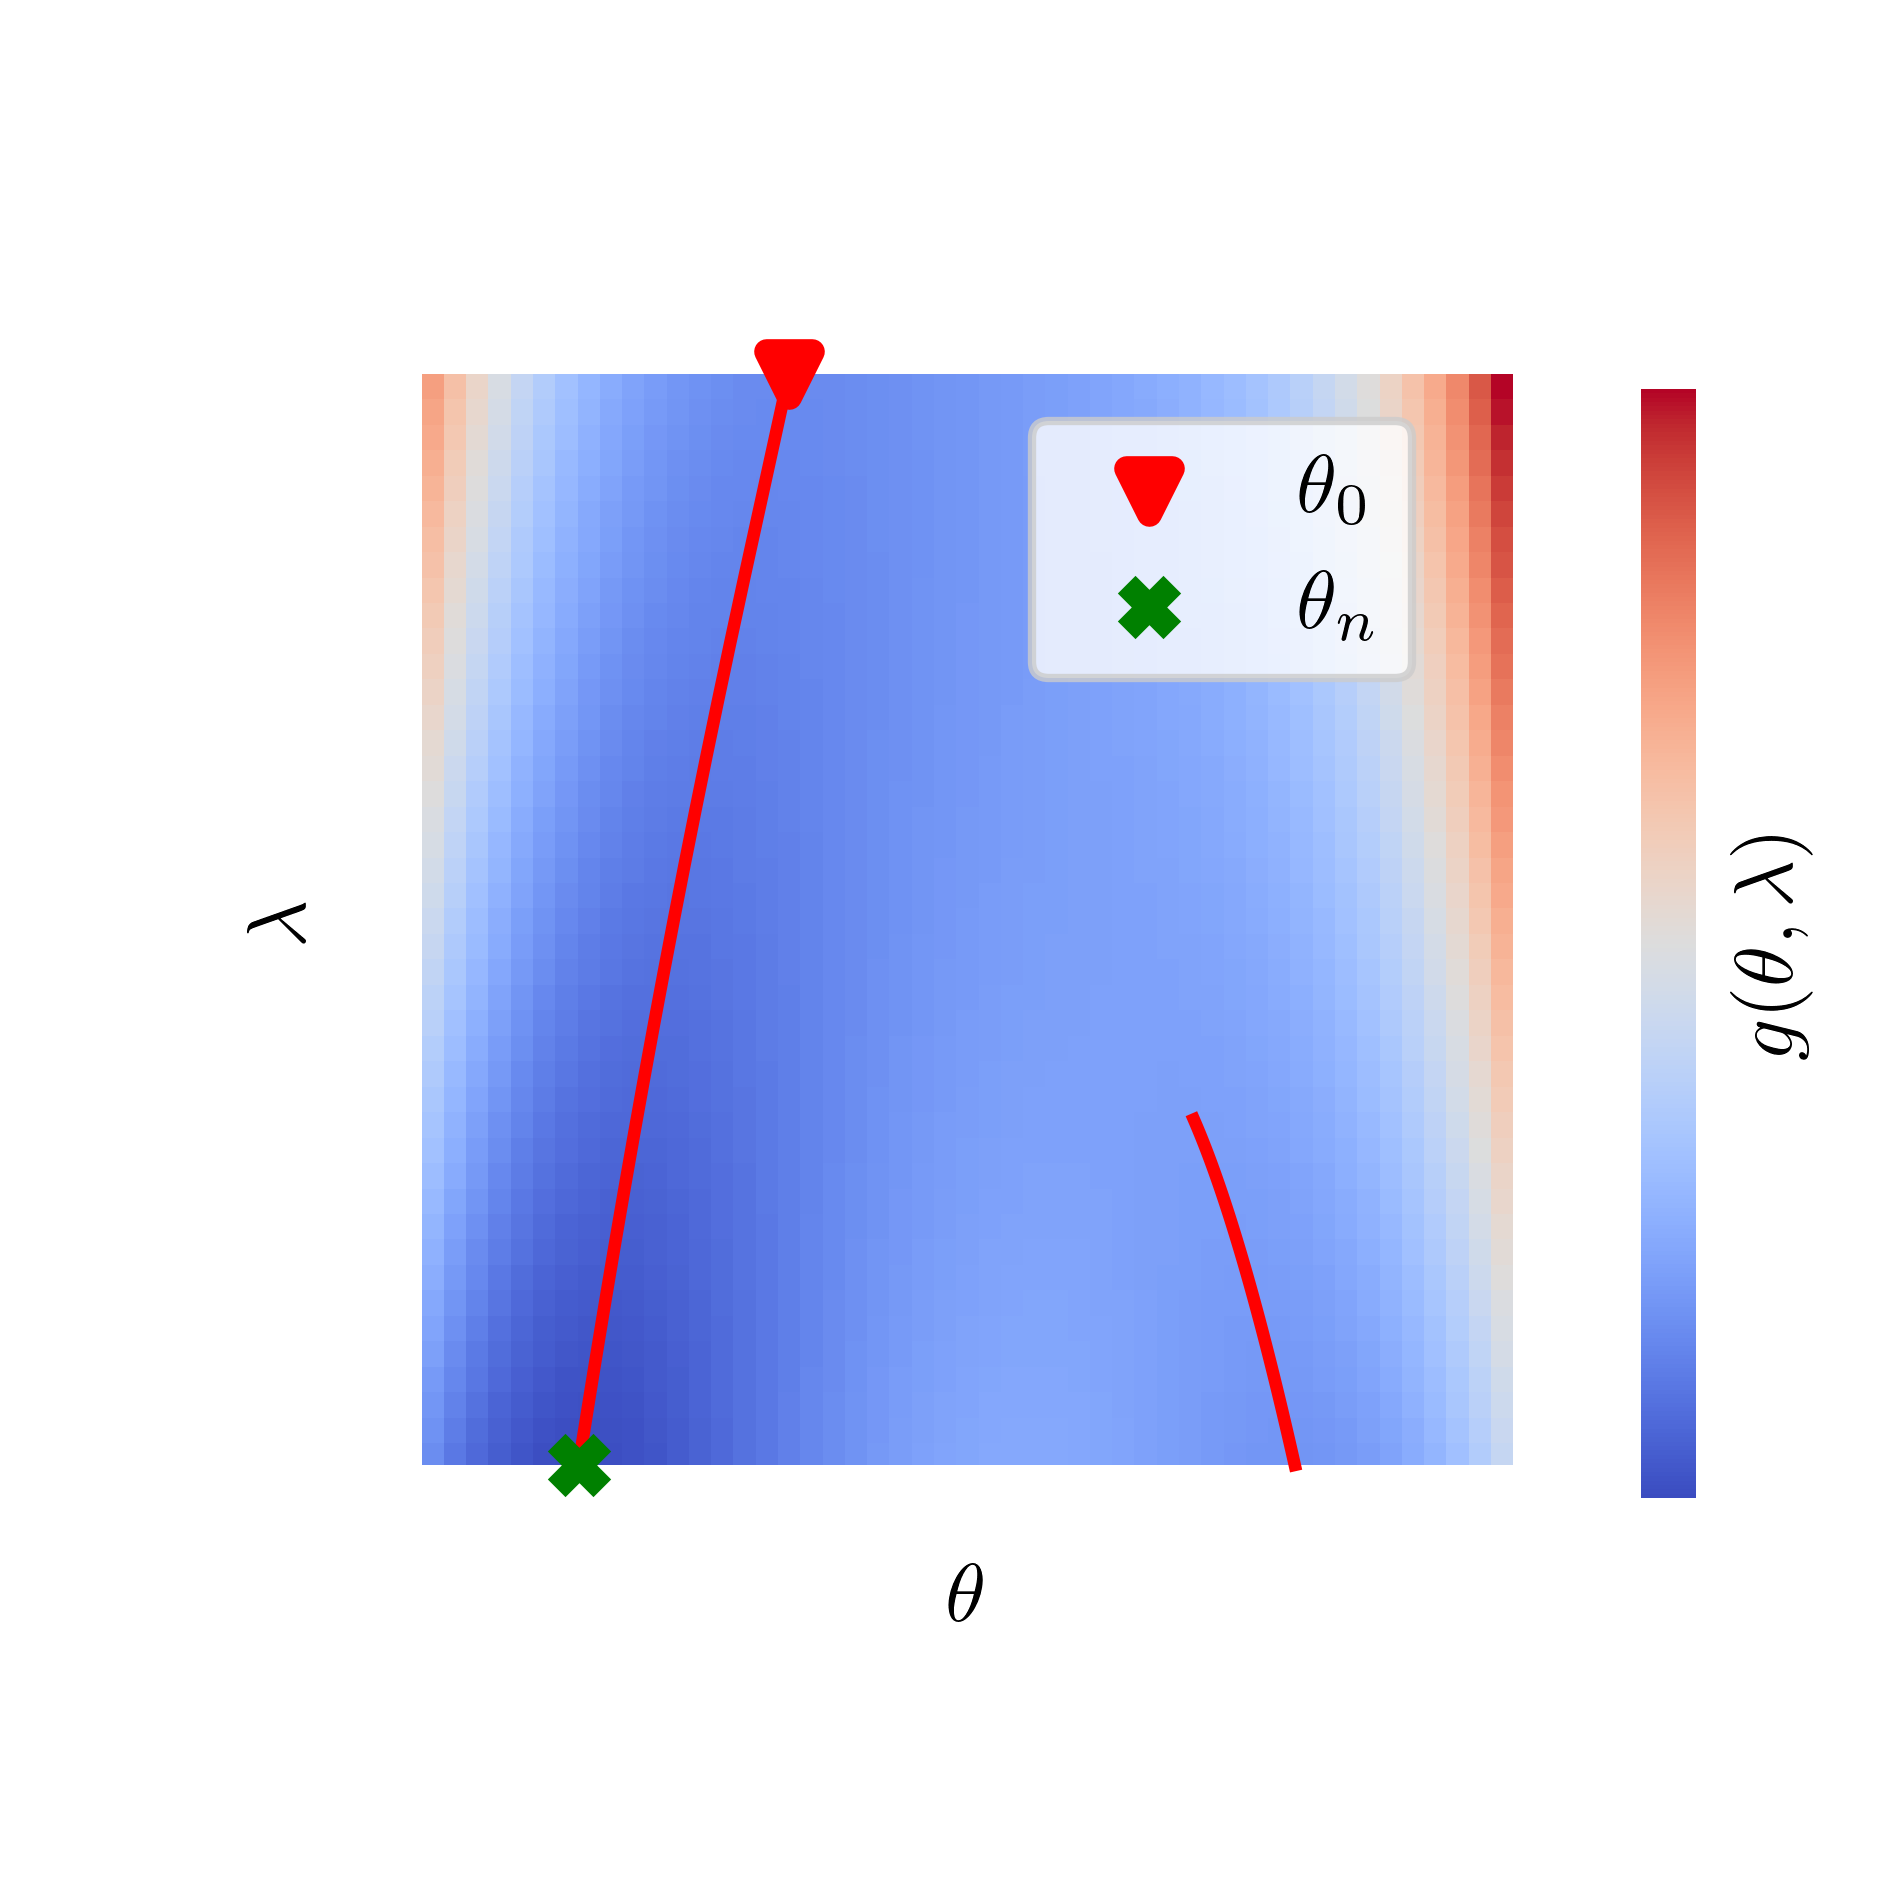

In [156]:
def main():
    ntheta = 50
    ncont = 301

    theta = np.outer(np.linspace(-1.0, 1.5, ntheta), np.ones(ncont))
    cont = np.outer(np.ones(ntheta), np.linspace(0.25, 0.0001, ncont))
    z = np.zeros((ntheta, ncont))

    thetamin1 = []
    thetamin2 = []
    contmin1 = []
    contmin2 = []
    zmin1 = []
    zmin2 = []

    for j in range(ncont):
        for i in range(ntheta):
            z[i,j] = g(theta[i,j], cont[i,j])
    
        thetamin1.append(sp.optimize.minimize(g, -1.5, args=(cont[0, j],)).x[0])
        contmin1.append(cont[0, j])
        zmin1.append(g(thetamin1[-1], contmin1[-1]))
        nextthetamin2 = sp.optimize.minimize(g, 1.5, args=(cont[0, j],)).x[0]

        if abs(nextthetamin2 - thetamin1[-1]) > 0.01:
            thetamin2.append(nextthetamin2)
            contmin2.append(cont[0, j])
            zmin2.append(g(thetamin2[-1], contmin2[-1]))
    
    fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = plt.axes(projection='3d', computed_zorder=False)
    ax.grid(False)
    ax.set_proj_type('ortho')
    ax.plot_surface(theta, cont, z, cmap='coolwarm', edgecolor=None, zorder=-1)

    color_tuple = (1.0, 1.0, 1.0, 0.0)

    ax.xaxis.set_pane_color(color_tuple)
    ax.yaxis.set_pane_color(color_tuple)
    ax.zaxis.set_pane_color(color_tuple)
    ax.xaxis.line.set_color(color_tuple)
    ax.yaxis.line.set_color(color_tuple)
    ax.zaxis.line.set_color(color_tuple)

    ax.elev = 90
    ax.azim = -90

    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_ticklabels([])
        axis._axinfo['tick']['inward_factor'] = 0.0
        axis._axinfo['tick']['outward_factor'] = 0.0

    ax.set_xlabel(r'$\theta$', labelpad=-10)
    ax.set_ylabel(r'$\lambda$', labelpad=-10)
    #ax.set_zlabel(r'$g(\theta, \lambda)$', labelpad=-10)

    cbar = plt.colorbar(mappable=ax.get_children()[0], ax=ax, label=r'$g(\theta, \lambda)$', shrink=0.6, pad=-0.1)
    cbar.set_ticks([])
    cbar.outline.set_visible(False)

    ax.plot(thetamin1, contmin1, zmin1, color='red', zorder=5)#, label=r"$\theta^\star(\lambda)$")
    ax.plot(thetamin2, contmin2, zmin2, color='red', zorder=5)

    #ax.scatter(thetamin[0], contmin[0], zmin[0], marker="o", color="red", linewidth=3, s=30, zorder=6, label=r"Initial guess $\theta_{-1}$")
    ax.scatter(thetamin1[0], contmin1[0], zmin1[0], marker="v", color="red", linewidth=3, s=30, zorder=7, label=r"$\theta_{0}$")
    ax.scatter(thetamin1[-1], contmin1[-1], zmin1[-1], marker="x", color="green", linewidth=3, s=30, zorder=8, label=r"$\theta_{n}$")
    #ax.scatter(thetamin2[-1], contmin2[-1], zmin2[-1], marker="x", color="green", linewidth=3, s=30, zorder=8)#, label=r"Final minimum $\theta_{n}$")
    ax.legend(loc=(0.55, 0.65))

    ax.set_xlim(-1.0, 1.5)
    ax.set_ylim(0.0, 0.25)

    #fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()